<a href="https://colab.research.google.com/github/pjoness/stock-markets-analytics-zoomcamp/blob/main/stock_markets_analytics_zoomcamp_homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

In [ ]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=21
Period for indexes: 1954-04-21 to 2024-04-21 


**Question 1.**

In [ ]:
start = date(year=2022, month=1, day=1)

gdpc = pdr.DataReader("GDPC1", "fred", start=start)

In [ ]:
gdpc_yoy_rate = gdpc / gdpc.shift(4) - 1

In [ ]:
res = gdpc_yoy_rate['GDPC1'].mean() * 100

print(f'{res.round(1)} %')

2.5 %


**Question 2.**

In [ ]:
start = date(2000,1,1)

dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs10 = pdr.DataReader("DGS10", "fred", start=start)

In [ ]:
dgs2.head()

,DGS2
DATE,
2000-01-03,6.38
2000-01-04,6.30
2000-01-05,6.38
2000-01-06,6.35
2000-01-07,6.31


In [ ]:
dgs10.head()

,DGS10
DATE,
2000-01-03,6.58
2000-01-04,6.49
2000-01-05,6.62
2000-01-06,6.57
2000-01-07,6.52


In [ ]:
dgs = dgs2.join(dgs10)

dgs.head()

,DGS2,DGS10
DATE,,
2000-01-03,6.38,6.58
2000-01-04,6.30,6.49
2000-01-05,6.38,6.62
2000-01-06,6.35,6.57
2000-01-07,6.31,6.52


In [ ]:
dgs['diff'] = dgs['DGS10'] - dgs['DGS2']

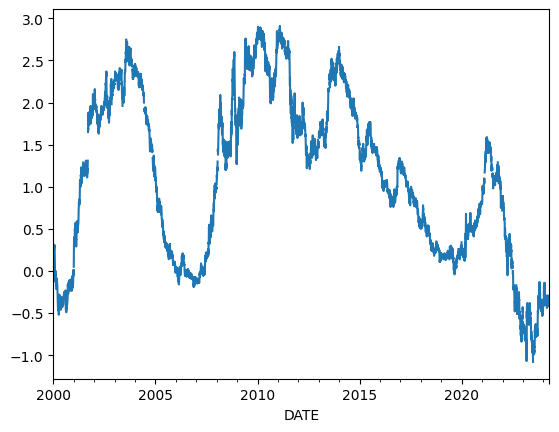

In [ ]:
dgs['diff'].plot.line();

In [ ]:
dgs['diff'].min()

-1.0800000000000005

An inverted yield curve could be a sign of a future economic recession, as investors move money from low term to high term debt bonds.

**Question 3.**

In [ ]:
gspc = yf.download(tickers = "^GSPC",
                   start = "2019-04-09",
                   end = "2024-04-10",
                   interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
gspc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-09,2886.580078,2886.879883,2873.330078,2878.199951,2878.199951,3032480000
2019-04-10,2881.370117,2889.709961,2879.129883,2888.209961,2888.209961,3092230000
2019-04-11,2891.919922,2893.419922,2881.989990,2888.320068,2888.320068,2970650000
2019-04-12,2900.860107,2910.540039,2898.370117,2907.409912,2907.409912,3726050000
2019-04-15,2908.320068,2909.600098,2896.479980,2905.580078,2905.580078,3114530000


In [ ]:
mxx = yf.download(tickers = "^MXX",
                   start = "2019-04-09",
                   end = "2024-04-10",
                   interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
mxx.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-09,45346.828125,45346.828125,44854.531250,45151.628906,45151.628906,191575000
2019-04-10,45204.750000,45219.410156,44850.109375,44909.140625,44909.140625,145314900
2019-04-11,44872.531250,44966.500000,44373.488281,44580.058594,44580.058594,109090000
2019-04-12,44767.671875,44888.699219,44534.378906,44686.058594,44686.058594,143662400
2019-04-15,44649.738281,44900.929688,44347.531250,44625.781250,44625.781250,108627100


In [ ]:
df1 = gspc.join(mxx, lsuffix='_gspc', rsuffix='_mxx')[['Close_gspc','Close_mxx']]

In [ ]:
df2 = df1 / df1.iloc[0]

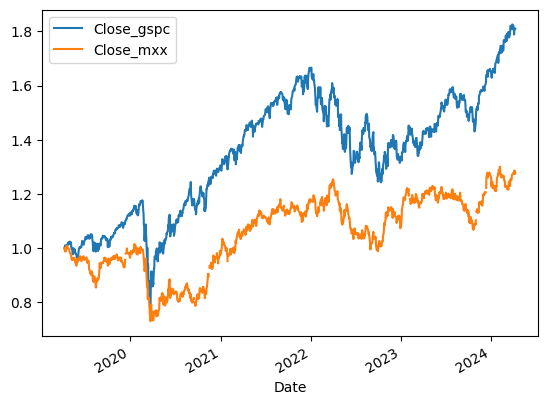

In [ ]:
df2.plot.line();

In [ ]:
rates = df1.iloc[-1] / df1.iloc[0] - 1

rates

Close_gspc    0.810128
Close_mxx     0.275062
dtype: float64

In [ ]:
max_rate = (rates.max() * 100).round(0)

max_rate

81.0

In [ ]:
print(f'The higher growing index is GSPC: {max_rate} %')

The higher growing index is GSPC: 81.0 %


**Question 4.**

In [ ]:
sr = yf.download(tickers = "2222.SR",
                      start = "2023-01-01",
                      end = "2024-01-01",
                      interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
brk = yf.download(tickers = "BRK-B",
                      start = "2023-01-01",
                      end = "2024-01-01",
                      interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
aapl = yf.download(tickers = "AAPL",
                      start = "2023-01-01",
                      end = "2024-01-01",
                      interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
msft = yf.download(tickers = "MSFT",
                      start = "2023-01-01",
                      end = "2024-01-01",
                      interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
goog = yf.download(tickers = "GOOG",
                      start = "2023-01-01",
                      end = "2024-01-01",
                      interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
jpm = yf.download(tickers = "JPM",
                      start = "2023-01-01",
                      end = "2024-01-01",
                      interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
l_range_ratio_sr = (sr['Adj Close'].max() - sr['Adj Close'].min()) / sr['Adj Close'].max()
l_range_ratio_brk = (brk['Adj Close'].max() - brk['Adj Close'].min()) / brk['Adj Close'].max()
l_range_ratio_aapl = (aapl['Adj Close'].max() - aapl['Adj Close'].min()) / aapl['Adj Close'].max()
l_range_ratio_msft = (msft['Adj Close'].max() - msft['Adj Close'].min()) / msft['Adj Close'].max()
l_range_ratio_goog = (goog['Adj Close'].max() - goog['Adj Close'].min()) / goog['Adj Close'].max()
l_range_ratio_jpm = (jpm['Adj Close'].max() - jpm['Adj Close'].min()) / jpm['Adj Close'].max()

In [ ]:
print(f'2222.SR: {(l_range_ratio_sr * 100).round(1)} %')
print(f'BRK-B: {(l_range_ratio_brk * 100).round(1)} %')
print(f'AAPL: {(l_range_ratio_aapl * 100).round(1)} %')
print(f'MSFT: {(l_range_ratio_msft * 100).round(1)} %')
print(f'GOOG: {(l_range_ratio_goog * 100).round(1)} %')
print(f'JPM: {(l_range_ratio_jpm * 100).round(1)} %')

2222.SR: 21.4 %
BRK-B: 20.8 %
AAPL: 37.2 %
MSFT: 42.4 %
GOOG: 39.2 %
JPM: 28.2 %


This metric is useful for estimate the volatility of a stock

**Question 5.**

In [ ]:
def dividend_yield(stock_name):
  sr = yf.download(tickers = stock_name,
                      start = "2023-01-01",
                      end = "2024-01-01",
                      interval = "1d")

  sr_div = yf.Ticker('2222.SR')
  sr_div = sr_div.get_actions()['Dividends'].reset_index()
  dividends = sr_div[(sr_div['Date'] >= "2023-01-01") & (sr_div['Date'] <= "2023-12-31")]['Dividends'].sum()

  div_yield_sr = (dividends / sr.iloc[-1]['Adj Close']) * 100

  return div_yield_sr

In [ ]:
div_yield_sr = dividend_yield('2222.SR')
div_yield_bkr = dividend_yield('BRK-B')
div_yield_appl = dividend_yield('AAPL')
div_yield_msft = dividend_yield('MSFT')
div_yield_goog = dividend_yield('GOOG')
div_yield_jpm = dividend_yield('JPM')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
div_yields = {
    '2222.SR': div_yield_sr,
    'BRK-B': div_yield_bkr,
    'AAPL': div_yield_appl,
    'MSFT': div_yield_msft,
    'GOOG': div_yield_goog,
    'JPM': div_yield_jpm
}

In [ ]:
max_val = 0
stock = None

for key, val in div_yields.items():
  if val >= max_val:
    max_val = val
    stock = key

In [ ]:
print(f'{stock}:, {max_val.round(1)}')

2222.SR:, 2.8


**Question 6.**

In [ ]:
bbva = yf.download(tickers = 'BBVA',
                      start = "2023-01-01",
                      end = "2024-01-01",
                      interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
bbva.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,6.16,6.21,6.15,6.17,5.548749,1452900
2023-01-04,6.40,6.48,6.36,6.47,5.818542,1891700
2023-01-05,6.44,6.50,6.43,6.49,5.836529,1169100
2023-01-06,6.49,6.60,6.47,6.60,5.935453,1309300
2023-01-09,6.67,6.73,6.66,6.68,6.007398,1593800


In [ ]:
san = yf.download(tickers = 'SAN',
                  start = "2023-01-01",
                  end = "2024-01-01",
                  interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
san.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,3.00,3.02,2.97,3.00,2.879935,4151600
2023-01-04,3.09,3.13,3.08,3.12,2.995132,4910100
2023-01-05,3.10,3.12,3.08,3.11,2.985533,3257500
2023-01-06,3.15,3.22,3.13,3.20,3.071931,4140100
2023-01-09,3.23,3.24,3.20,3.21,3.081531,3011400


In [ ]:
df2 = bbva.join(san, lsuffix=' BBVA', rsuffix=' Santander')

For my project I will use info from largest spanish companies, including BBVA and Banco Santander.

In [ ]:
df3 = df2[['Adj Close BBVA','Adj Close Santander']]

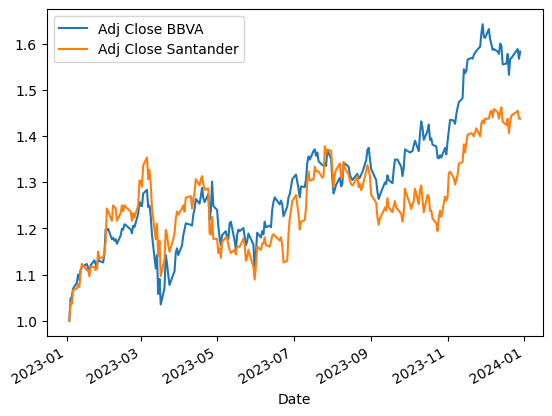

In [ ]:
(df3 / df3.iloc[0]).plot.line();

**Question 7.**